INFOMHNA Lab Assignment 1

Christian Acosta - 6369251

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2023-02-15 13:18:26.934366: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-15 13:18:27.700403: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/christian/miniconda3/envs/tf/lib/
2023-02-15 13:18:27.700474: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/christian/miniconda3/envs/tf/lib/
2023-02-15 13:18:27.700480: W tensorflow/compile

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
(x_train.shape)

(60000, 28, 28)

Exercise one: Identifying handwritten numbers

Fully-connected neural networks

In [4]:
x_train_rs = x_train.reshape(60000, 784)
#np.reshape(x_train, len(x_train*28*28))

In [5]:
x_test_rs = x_test.reshape(10000, 784)

In [6]:
x_train_rs.shape
x_test_rs.shape

(10000, 784)

In [7]:
x_train_rs = x_train_rs/255

In [8]:
x_test_rs = x_test_rs/255

In [12]:
y_train_labels = keras.utils.to_categorical(y_train, 10)

In [13]:
y_test_labels = keras.utils.to_categorical(y_test, 10)

In [14]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

2023-02-15 13:20:06.207900: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-15 13:20:06.212404: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-15 13:20:06.212555: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-15 13:20:06.213079: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [17]:
history = model.fit(x_train_rs, y_train_labels, batch_size=128, 
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12


2023-02-15 13:20:17.284848: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7feecf35f470 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-15 13:20:17.284868: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1060, Compute Capability 6.1
2023-02-15 13:20:17.288444: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-15 13:20:17.383419: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


375/375 [==============================] - 2s 3ms/step - loss: 0.4038 - accuracy: 0.8838 - val_loss: 0.3069 - val_accuracy: 0.9141
Epoch 2/12
375/375 [==============================] - 1s 2ms/step - loss: 0.3093 - accuracy: 0.9129 - val_loss: 0.2904 - val_accuracy: 0.9185
Epoch 3/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2964 - accuracy: 0.9157 - val_loss: 0.2757 - val_accuracy: 0.9252
Epoch 4/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2883 - accuracy: 0.9200 - val_loss: 0.2837 - val_accuracy: 0.9242
Epoch 5/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2830 - accuracy: 0.9205 - val_loss: 0.2813 - val_accuracy: 0.9237
Epoch 6/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2791 - accuracy: 0.9219 - val_loss: 0.2729 - val_accuracy: 0.9266
Epoch 7/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2756 - accuracy: 0.9226 - val_loss: 0.2746 - val_accuracy: 0.9268
Epoch 8/12
375/37

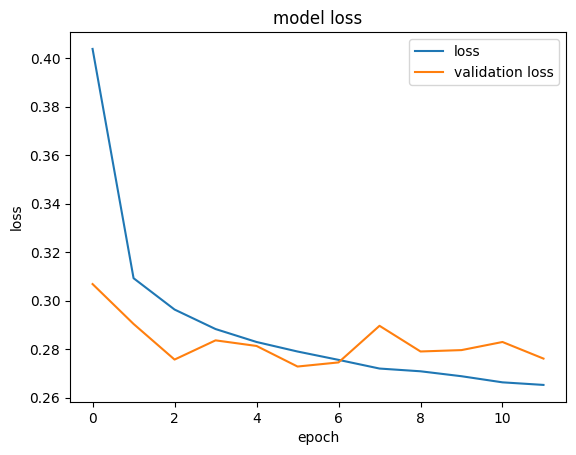

In [18]:
#Loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

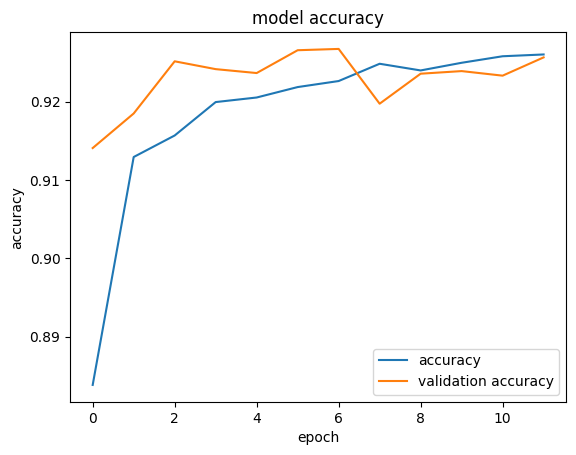

In [19]:
#Accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [20]:
loss, accuracy = model.evaluate(x_test_rs, y_test_labels, verbose=0)

In [21]:
print(loss, accuracy)

0.2814210057258606 0.92330002784729


Addition of RELU activation function

In [22]:
model_relu = keras.Sequential()
model_relu.add(keras.layers.Dense(256, input_shape=(784,), activation = 'relu'))
model_relu.add(keras.layers.Dense(10, activation='softmax'))

In [23]:
model_relu.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_relu.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [25]:
history_relu = model_relu.fit(x_train_rs, y_train_labels, batch_size=128, 
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 2s 3ms/step - loss: 0.3228 - accuracy: 0.9093 - val_loss: 0.1754 - val_accuracy: 0.9496
Epoch 2/12
375/375 [==============================] - 1s 2ms/step - loss: 0.1471 - accuracy: 0.9571 - val_loss: 0.1224 - val_accuracy: 0.9658
Epoch 3/12
375/375 [==============================] - 1s 2ms/step - loss: 0.1011 - accuracy: 0.9701 - val_loss: 0.1090 - val_accuracy: 0.9678
Epoch 4/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0764 - accuracy: 0.9779 - val_loss: 0.1016 - val_accuracy: 0.9722
Epoch 5/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0598 - accuracy: 0.9827 - val_loss: 0.0842 - val_accuracy: 0.9739
Epoch 6/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0482 - accuracy: 0.9863 - val_loss: 0.0845 - val_accuracy: 0.9751
Epoch 7/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0384 - accuracy: 0.9893 - val_loss: 0.0844 - val_accuracy: 0.9748
Epoch 

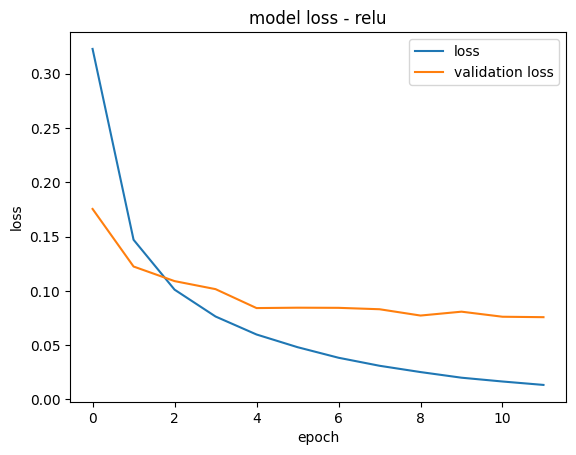

In [26]:
#Loss graph
plt.plot(history_relu.history['loss'])
plt.plot(history_relu.history['val_loss'])
plt.title('model loss - relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

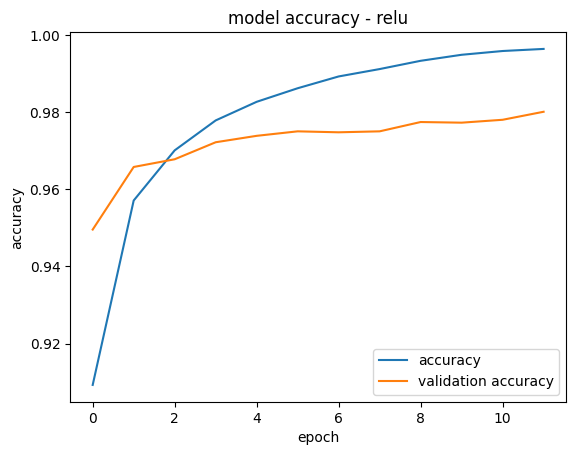

In [27]:
#Accuracy graph
plt.plot(history_relu.history['accuracy'])
plt.plot(history_relu.history['val_accuracy'])
plt.title('model accuracy - relu')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [28]:
loss_relu, accuracy_relu = model_relu.evaluate(x_test_rs, y_test_labels, verbose=0)

In [29]:
print(loss_relu, accuracy_relu)

0.07142027467489243 0.9800000190734863


Deep convolutional neural networks

In [30]:
x_train_deep = x_train.reshape(60000, 28, 28, 1)

In [31]:
x_test_deep = x_test.reshape(10000, 28, 28, 1)

In [32]:
x_train_deep.shape()

TypeError: 'tuple' object is not callable

In [33]:
x_train_deep = x_train_deep/255

In [34]:
x_test_deep = x_test_deep/255

In [35]:
model_dnn = keras.Sequential()
model_dnn.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
activation="relu", input_shape=(28, 28, 1)))
model_dnn.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
activation="relu"))
model_dnn.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_dnn.add(keras.layers.Flatten())
model_dnn.add(keras.layers.Dense(128, activation="relu"))
model_dnn.add(keras.layers.Dense(10, activation="softmax"))
model_dnn.compile(loss='categorical_crossentropy')


In [36]:
model_dnn.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.Adadelta(learning_rate=1), 
metrics='accuracy')

In [37]:
history_dnn = model_dnn.fit(x_train_deep, y_train_labels, batch_size=128, 
epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6


2023-02-15 13:21:17.122994: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100


375/375 [==============================] - 6s 10ms/step - loss: 0.2245 - accuracy: 0.9306 - val_loss: 0.0692 - val_accuracy: 0.9793
Epoch 2/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0520 - accuracy: 0.9841 - val_loss: 0.0501 - val_accuracy: 0.9842
Epoch 3/6
375/375 [==============================] - 3s 9ms/step - loss: 0.0316 - accuracy: 0.9907 - val_loss: 0.0406 - val_accuracy: 0.9880
Epoch 4/6
375/375 [==============================] - 3s 9ms/step - loss: 0.0212 - accuracy: 0.9937 - val_loss: 0.0538 - val_accuracy: 0.9843
Epoch 5/6
375/375 [==============================] - 3s 9ms/step - loss: 0.0143 - accuracy: 0.9956 - val_loss: 0.0467 - val_accuracy: 0.9883
Epoch 6/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0096 - accuracy: 0.9971 - val_loss: 0.0417 - val_accuracy: 0.9880


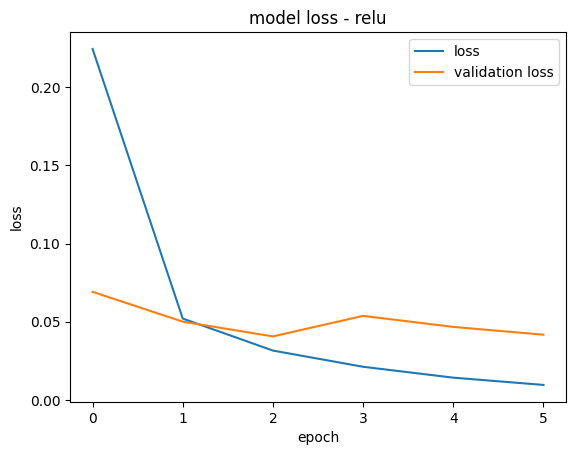

In [38]:
#Loss graph
plt.plot(history_dnn.history['loss'])
plt.plot(history_dnn.history['val_loss'])
plt.title('model loss - relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

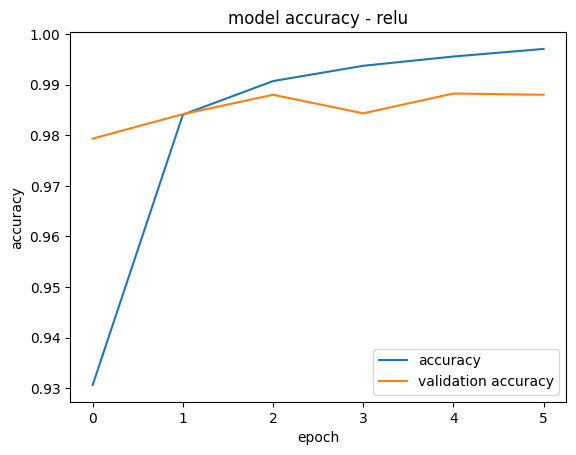

In [39]:
#Accuracy graph
plt.plot(history_dnn.history['accuracy'])
plt.plot(history_dnn.history['val_accuracy'])
plt.title('model accuracy - relu')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [40]:
loss_dnn, accuracy_dnn = model_dnn.evaluate(x_test_deep, y_test_labels, verbose=0)

In [41]:
print(loss_dnn, accuracy_dnn)

0.03379843011498451 0.9900000095367432


Dropout layers

In [42]:
model_dnn_dropout = keras.Sequential()
model_dnn_dropout.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
activation="relu", input_shape=(28, 28, 1)))
model_dnn_dropout.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
activation="relu"))
model_dnn_dropout.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_dnn_dropout.add(keras.layers.Dropout(rate=0.25))
model_dnn_dropout.add(keras.layers.Flatten())
model_dnn_dropout.add(keras.layers.Dense(128, activation="relu"))
model_dnn_dropout.add(keras.layers.Dense(10, activation="softmax"))
model_dnn_dropout.add(keras.layers.Dropout(rate=0.50))
model_dnn_dropout.compile(loss='categorical_crossentropy')


In [43]:
model_dnn_dropout.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.Adadelta(learning_rate=1), 
metrics='accuracy')

In [44]:
history_dnn_dropout = model_dnn.fit(x_train_deep, y_train_labels, batch_size=128, 
epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.0503 - val_accuracy: 0.9878
Epoch 2/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0453 - val_accuracy: 0.9882
Epoch 3/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0499 - val_accuracy: 0.9891
Epoch 4/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0567 - val_accuracy: 0.9888
Epoch 5/6
375/375 [==============================] - 4s 10ms/step - loss: 8.3322e-04 - accuracy: 0.9998 - val_loss: 0.0559 - val_accuracy: 0.9887
Epoch 6/6
375/375 [==============================] - 4s 10ms/step - loss: 3.5907e-04 - accuracy: 1.0000 - val_loss: 0.0572 - val_accuracy: 0.9892


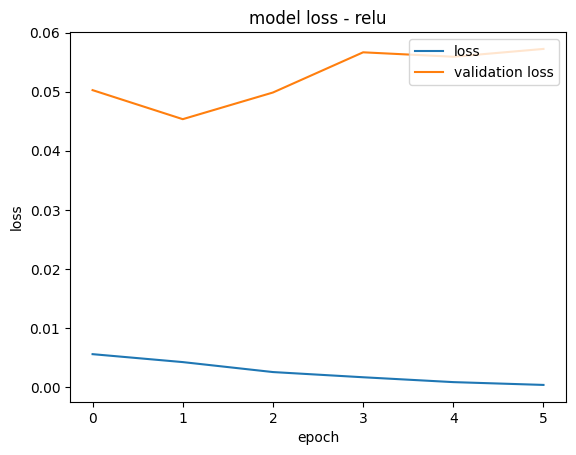

In [45]:
#Loss graph
plt.plot(history_dnn_dropout.history['loss'])
plt.plot(history_dnn_dropout.history['val_loss'])
plt.title('model loss - relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

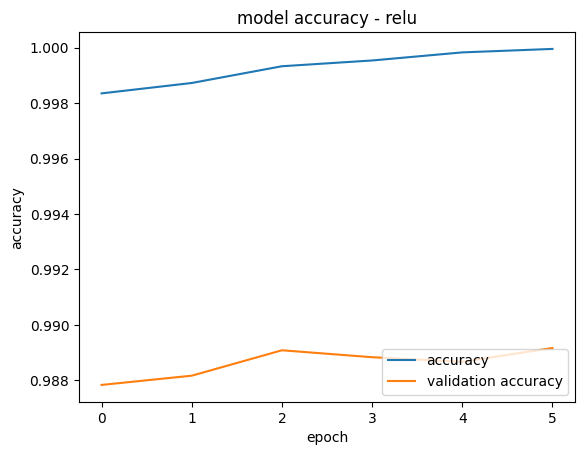

In [46]:
#Accuracy graph
plt.plot(history_dnn_dropout.history['accuracy'])
plt.plot(history_dnn_dropout.history['val_accuracy'])
plt.title('model accuracy - relu')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [47]:
loss_dnn_dropout, accuracy_dnn_dropout = model_dnn_dropout.evaluate(x_test_deep, y_test_labels, verbose=0)

In [48]:
#Check results --> don't seem to make sense
#generalizability seems to be very bad compared to no dropout model 
print(loss_dnn_dropout, accuracy_dnn_dropout)

2.3056981563568115 0.11219999939203262


Exercise two: Identifying objects from images

In [49]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 10s 0us/step
